In [9]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
import math

In [39]:
img = np.asarray(Image.open('Images/train/REAL/0000 (2).jpg'))

In [40]:
print(repr(img))

array([[[168, 180, 192],
        [174, 186, 198],
        [179, 191, 207],
        ...,
        [163, 179, 205],
        [163, 179, 205],
        [161, 177, 203]],

       [[169, 181, 193],
        [167, 181, 194],
        [162, 175, 191],
        ...,
        [163, 178, 207],
        [161, 176, 205],
        [157, 172, 201]],

       [[156, 172, 185],
        [147, 163, 178],
        [130, 146, 162],
        ...,
        [162, 181, 213],
        [158, 177, 209],
        [151, 170, 202]],

       ...,

       [[ 78,  83,  86],
        [ 79,  84,  87],
        [ 89,  94,  97],
        ...,
        [ 73,  73,  75],
        [ 72,  70,  73],
        [ 67,  65,  68]],

       [[ 70,  72,  71],
        [ 75,  77,  76],
        [ 79,  81,  80],
        ...,
        [ 72,  77,  81],
        [ 68,  72,  75],
        [ 60,  64,  67]],

       [[ 74,  74,  72],
        [ 72,  72,  70],
        [ 69,  69,  69],
        ...,
        [ 74,  83,  88],
        [ 75,  82,  88],
        [ 72,  77,  81]]

In [41]:
img.shape

(32, 32, 3)

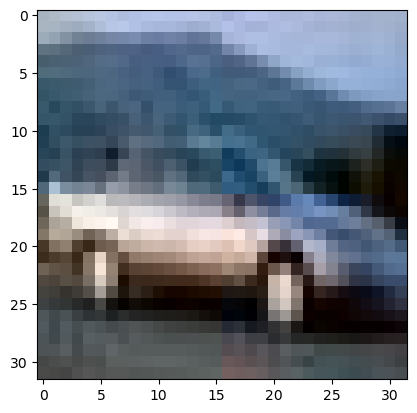

In [42]:
imgplot = plt.imshow(img)

In [43]:
train_real = os.listdir('Images/train/REAL')
train_fake = os.listdir('Images/train/FAKE')
test_real = os.listdir('Images/test/REAL')
test_fake = os.listdir('Images/test/FAKE')

## Creating training dataset

In [44]:
df_1 = pd.DataFrame(train_real, columns=['Filename'])

In [45]:
df_1['Real'] = 1
df_1['Filename'] = 'Images/train/REAL/' + df_1['Filename']

In [46]:
df_1.size

100000

In [47]:
df_2 = pd.DataFrame(train_fake, columns=['Filename'])
df_2['Real'] = 0
df_2['Filename'] = 'Images/train/FAKE/' + df_2['Filename']

In [48]:
df_2.size

100000

In [49]:
train_df = pd.merge(df_1, df_2, how='outer')

In [50]:
train_df

,Filename,Real
0,Images/train/REAL/0000 (10).jpg,1
1,Images/train/REAL/0000 (2).jpg,1
2,Images/train/REAL/0000 (3).jpg,1
3,Images/train/REAL/0000 (4).jpg,1
4,Images/train/REAL/0000 (5).jpg,1
...,...,...
99995,Images/train/FAKE/5999 (6).jpg,0
99996,Images/train/FAKE/5999 (7).jpg,0
99997,Images/train/FAKE/5999 (8).jpg,0
99998,Images/train/FAKE/5999 (9).jpg,0


In [51]:
train_df.to_csv('train.csv', index=False)

## Making small training set

In [8]:
train_df = pd.read_csv('train.csv')

In [13]:
train_df.head(55)

,Filename,Real
0,Images/train/REAL/0000 (10).jpg,1
1,Images/train/REAL/0000 (2).jpg,1
2,Images/train/REAL/0000 (3).jpg,1
3,Images/train/REAL/0000 (4).jpg,1
4,Images/train/REAL/0000 (5).jpg,1
...,...,...
70,Images/train/REAL/0007 (10).jpg,1
71,Images/train/REAL/0007 (2).jpg,1
72,Images/train/REAL/0007 (3).jpg,1
73,Images/train/REAL/0007 (4).jpg,1


In [15]:
train_df.tail(55)

,Filename,Real
99945,Images/train/FAKE/5994 (6).jpg,0
99946,Images/train/FAKE/5994 (7).jpg,0
99947,Images/train/FAKE/5994 (8).jpg,0
99948,Images/train/FAKE/5994 (9).jpg,0
99949,Images/train/FAKE/5994.jpg,0
99950,Images/train/FAKE/5995 (10).jpg,0
99951,Images/train/FAKE/5995 (2).jpg,0
99952,Images/train/FAKE/5995 (3).jpg,0
99953,Images/train/FAKE/5995 (4).jpg,0
99954,Images/train/FAKE/5995 (5).jpg,0


In [27]:
small_train = pd.merge(train_df.head(100), train_df.tail(100), how="outer")

In [28]:
small_train

,Filename,Real
0,Images/train/REAL/0000 (10).jpg,1
1,Images/train/REAL/0000 (2).jpg,1
2,Images/train/REAL/0000 (3).jpg,1
3,Images/train/REAL/0000 (4).jpg,1
4,Images/train/REAL/0000 (5).jpg,1
...,...,...
195,Images/train/FAKE/5999 (6).jpg,0
196,Images/train/FAKE/5999 (7).jpg,0
197,Images/train/FAKE/5999 (8).jpg,0
198,Images/train/FAKE/5999 (9).jpg,0


In [29]:
small_train.to_csv('small_train.csv', index=False)

## Creating test dataset

In [17]:
df_3 = pd.DataFrame(test_real, columns=['Filename'])
df_4 = pd.DataFrame(test_fake, columns=['Filename'])

In [18]:
df_3['Real'] = 1
df_3['Filename'] = 'Images/test/REAL/' + df_3['Filename']

In [19]:
df_4['Real'] = 0
df_4['Filename'] = 'Images/test/FAKE/' + df_4['Filename']

In [20]:
test_df = pd.merge(df_3, df_4, how='outer')

In [21]:
test_df.to_csv('test.csv', index=False)

In [23]:
test_df = pd.read_csv('test.csv')

In [24]:
test_df

,Filename,Real
0,Images/test/REAL/0000 (10).jpg,1
1,Images/test/REAL/0000 (2).jpg,1
2,Images/test/REAL/0000 (3).jpg,1
3,Images/test/REAL/0000 (4).jpg,1
4,Images/test/REAL/0000 (5).jpg,1
...,...,...
19995,Images/test/FAKE/999 (6).jpg,0
19996,Images/test/FAKE/999 (7).jpg,0
19997,Images/test/FAKE/999 (8).jpg,0
19998,Images/test/FAKE/999 (9).jpg,0


## Making small testing set

In [30]:
small_test = pd.merge(test_df.head(50), test_df.tail(50), how="outer")

In [31]:
small_test

,Filename,Real
0,Images/test/REAL/0000 (10).jpg,1
1,Images/test/REAL/0000 (2).jpg,1
2,Images/test/REAL/0000 (3).jpg,1
3,Images/test/REAL/0000 (4).jpg,1
4,Images/test/REAL/0000 (5).jpg,1
...,...,...
95,Images/test/FAKE/999 (6).jpg,0
96,Images/test/FAKE/999 (7).jpg,0
97,Images/test/FAKE/999 (8).jpg,0
98,Images/test/FAKE/999 (9).jpg,0


In [40]:
small_test.to_csv('small_test.csv', index=False)

# Creating Class for AI Image Data

In [10]:
class AI_Image_Data(Dataset):
    
    def __init__(self, dataset, transform=None):
        
        self.dataframe = pd.read_csv(dataset)
        self.images = self.dataframe['Filename'].to_numpy() 
        self.labels = torch.from_numpy(self.dataframe['Real'].to_numpy())
        self.transform = transform
        
        
    def __getitem__(self, idx):
        
        #image = read_image(self.images[idx])
        image = Image.open(self.images[idx])
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label
        
    def __len__(self):
        
        return len(self.labels)

### Testing Image Class

(32, 32, 3)

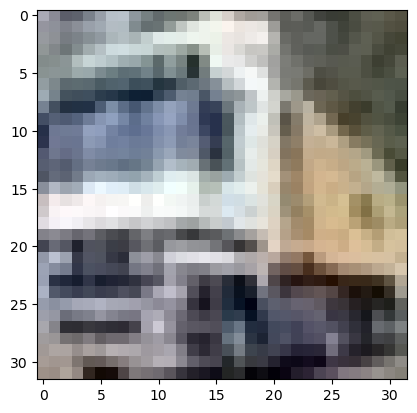

In [11]:
small = pd.read_csv('small_train.csv')
first = small.iloc[0,0]
img = np.asarray(Image.open(first))
imgplot = plt.imshow(img)
img.shape

In [12]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
training_data = AI_Image_Data("small_train.csv", transform=transform)
first_data = training_data[0]
features, labels = first_data
features.size()

torch.Size([3, 32, 32])

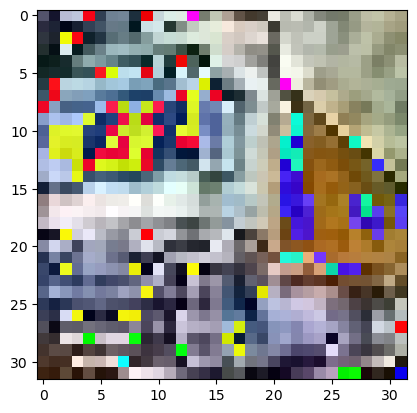

In [13]:
transform = transforms.ToPILImage()
img = transform(features)
plt.imshow(img)

In [14]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [15]:
train_loader = torch.utils.data.DataLoader(training_data, batch_size=4,
                                          shuffle=True)

In [16]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

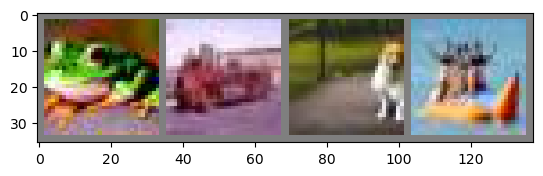

In [17]:
imshow(torchvision.utils.make_grid(images))

In [37]:
training_data = AI_Image_Data("small_train.csv",transform=transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)))
first_data = training_data[0]
features, labels = first_data

In [38]:
print(type(labels))
print(type(features))
print(len(training_data))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
200


In [42]:
testing_data = AI_Image_Data("small_test.csv",transform=transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)))
first_data = training_data[0]
features, labels = first_data

print(type(labels))
print(type(features))
print(len(testing_data))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
100


In [48]:
dataloader = DataLoader(dataset=testing_data, batch_size = 10, shuffle=True, num_workers=0)

In [49]:
num_epochs = 5
total_samples = len(testing_data)
n_iterations = math.ceil(total_samples / 10)
print(total_samples, n_iterations)

100 10


In [52]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        #forward backward, update
        if (i+1) % 5 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, step {i+1} /{n_iterations}, inputs {inputs.shape}')

Epoch 1/5, step 5 /10, inputs torch.Size([10, 3, 32, 32])
Epoch 1/5, step 10 /10, inputs torch.Size([10, 3, 32, 32])
Epoch 2/5, step 5 /10, inputs torch.Size([10, 3, 32, 32])
Epoch 2/5, step 10 /10, inputs torch.Size([10, 3, 32, 32])
Epoch 3/5, step 5 /10, inputs torch.Size([10, 3, 32, 32])
Epoch 3/5, step 10 /10, inputs torch.Size([10, 3, 32, 32])
Epoch 4/5, step 5 /10, inputs torch.Size([10, 3, 32, 32])
Epoch 4/5, step 10 /10, inputs torch.Size([10, 3, 32, 32])
Epoch 5/5, step 5 /10, inputs torch.Size([10, 3, 32, 32])
Epoch 5/5, step 10 /10, inputs torch.Size([10, 3, 32, 32])
